In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [67]:
from sklearn.metrics import classification_report, r2_score, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# **IMPORT & ANALYSIS**

In [68]:
df = pd.read_csv("/content/mhealth_raw_data.csv")
df

alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry       grz  Activity    subject  
0        0.187760 -0.449020 -1.01030  0.034483         0   subject1  
1        0.023595 -0.449020 -1.01030  0.034483         0   subject1  
2        0.275720 -0.449020 -1.01030  0.034483         0   subject1  
3        0.367520 -0.456860 -1.00820  0.025862         0   subject1  
4        0.407290 -0.456860 -1.00820  0.025862         0   subject1  
...           ...       ...      ...       ...       ...        ...  
1215740  0.294230  0.041176 -0.99384 -0.480600         0  subject10  
1215741  0.448140  0.041176 -0.99384 -0.480600         0  subject10  
1215742  0.450480  0.041176 -0.99384 -0.480600         0  subject10  
1215743  0.594880  0.041176 -0.99384 -0.480600         0  subject10  
1215744  0.761710  0.035294 -1.02050 -0.471980         0  subject10  

[1215745 rows x 14 columns]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [70]:
df.describe().T

count      mean       std      min       25%       50%  \
alx       1215745.0  1.494200  3.826485 -22.1460   0.14131  1.308900   
aly       1215745.0 -9.692878  4.171303 -19.6190 -10.20100 -9.670300   
alz       1215745.0 -0.954806  5.461803 -19.3730  -2.64940 -0.016456   
glx       1215745.0 -0.001599  0.491217  -2.1466  -0.43599 -0.014842   
gly       1215745.0 -0.616632  0.354641  -7.7899  -0.81801 -0.707320   
glz       1215745.0 -0.158781  0.546798  -2.6267  -0.59332 -0.190570   
arx       1215745.0 -3.713413  4.763586 -22.3610  -6.07600 -2.977600   
ary       1215745.0 -5.805526  5.757639 -18.9720  -9.40420 -7.461500   
arz       1215745.0  2.393880  3.876503 -18.2390   0.12965  1.928100   
grx       1215745.0 -0.276106  0.527689  -8.3392  -0.70588 -0.354900   
gry       1215745.0 -0.466434  0.555551  -3.5708  -0.89733 -0.634500   
grz       1215745.0  0.266633  0.564380  -2.6897  -0.23707  0.301720   
Activity  1215745.0  1.741465  3.283679   0.0000   0.00000  0.000000   

               75%      max  
alx       2.575800  20.0540  
aly      -9.042200  21.1610  
alz       1.301300  25.0150  
glx       0.448980  60.4840  
gly      -0.540340   2.0113  
glz       0.322200   2.7701  
arx      -1.193700  19.8640  
ary      -2.533900  22.1910  
arz       4.914700  25.7410  
grx       0.096078   3.3196  
gry      -0.106780   1.5565  
grz       0.778020   2.7500  
Activity  2.000000  12.0000

In [71]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [72]:
df.duplicated().sum()

np.int64(0)

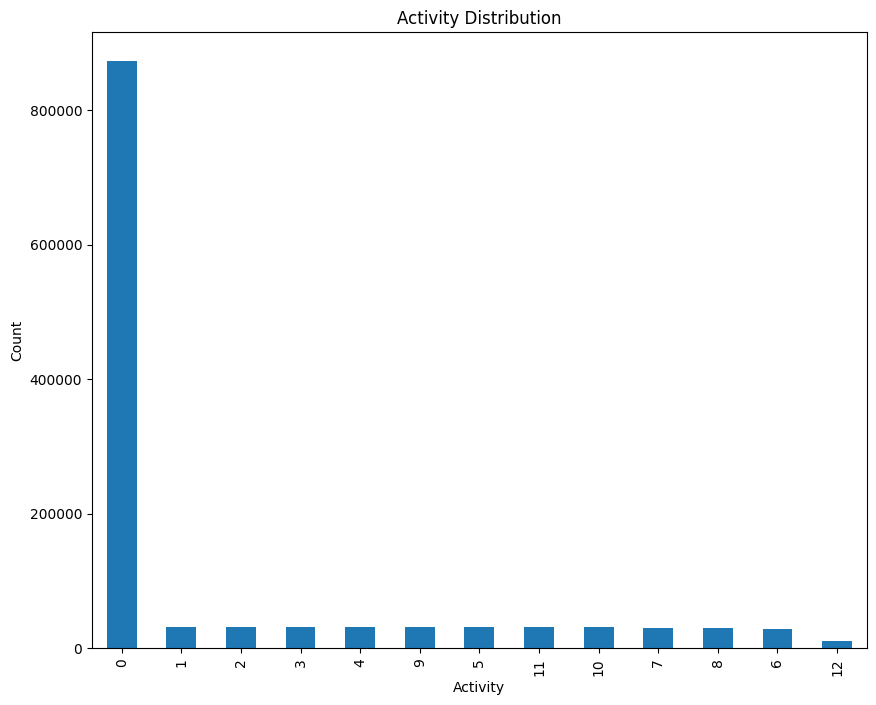

In [73]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot(kind='bar')
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


In [74]:
data_activity_0 = df[df['Activity'] == 0]
data_activity_else = df[df['Activity'] != 0]

In [75]:
data_activity_0 = data_activity_0.sample(n = 40000)
df = pd.concat([data_activity_0, data_activity_else])

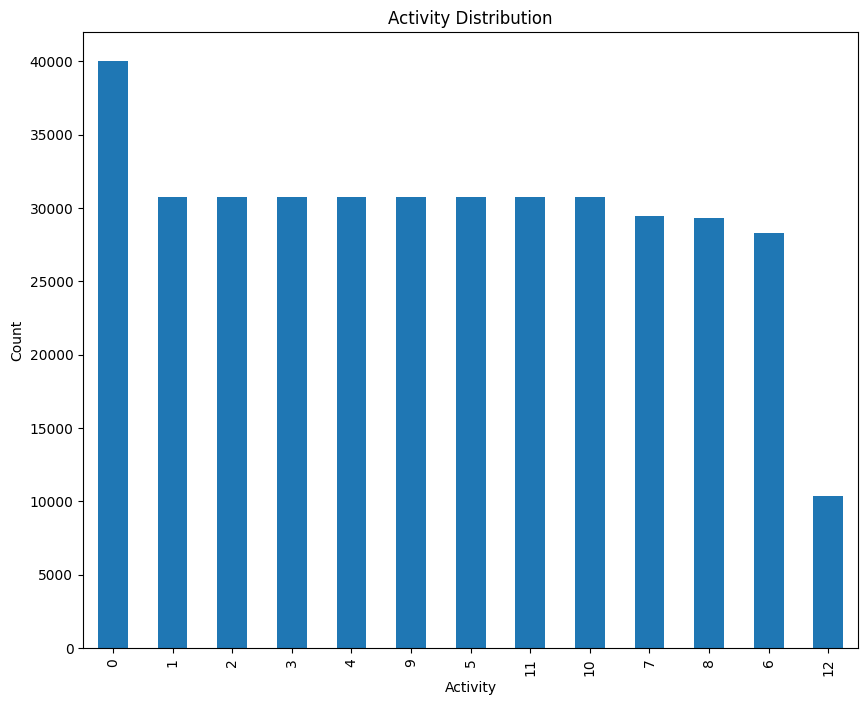

In [76]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot(kind='bar')
plt.title('Activity Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

In [77]:
len(df)

383195

# **EDA**

In [78]:
activity_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

========Standing still (1 min) - a========


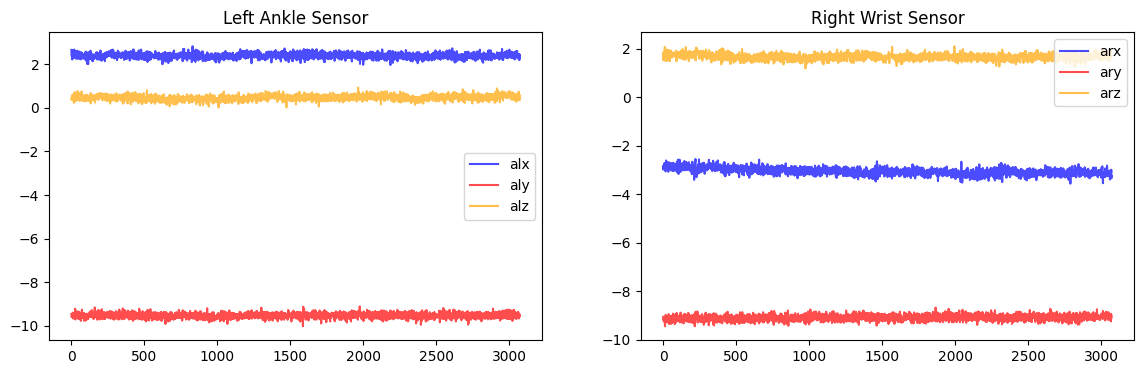

========Standing still (1 min) - g========


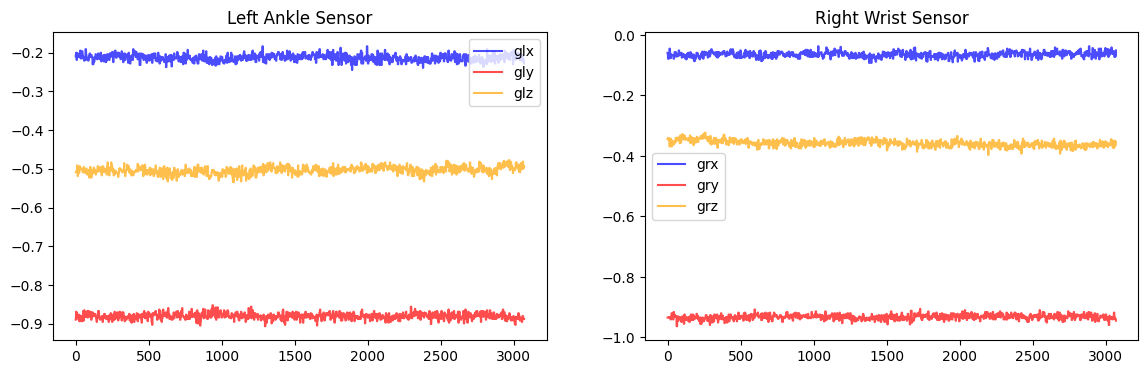

========Sitting and relaxing (1 min) - a========


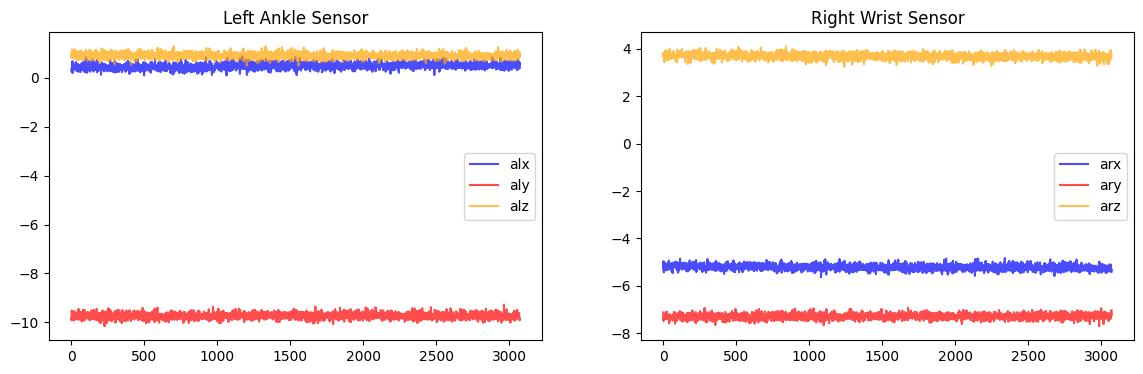

========Sitting and relaxing (1 min) - g========


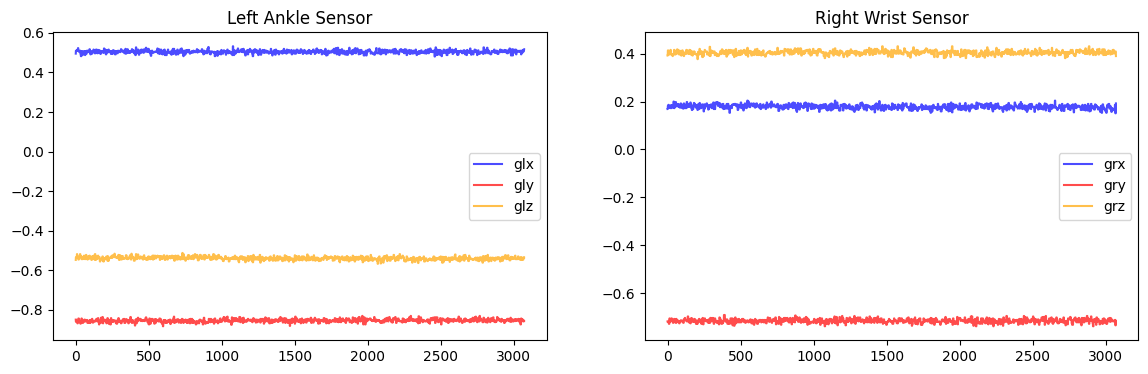

========Lying down (1 min) - a========


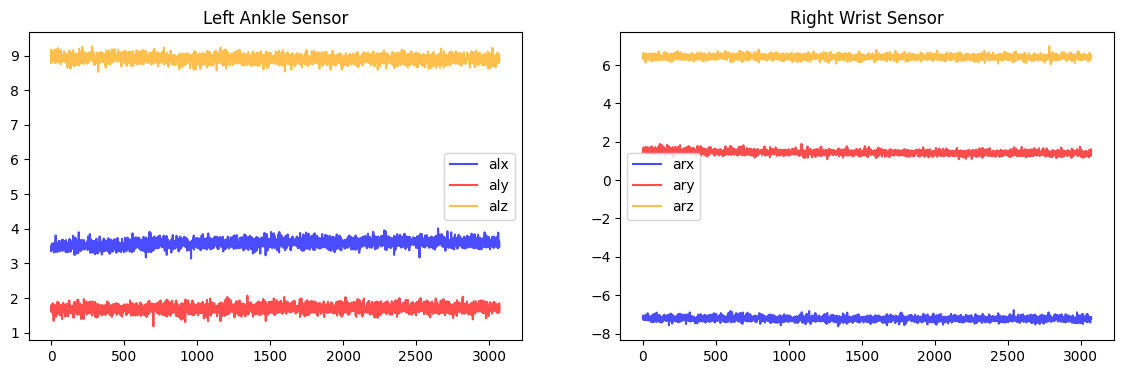

========Lying down (1 min) - g========


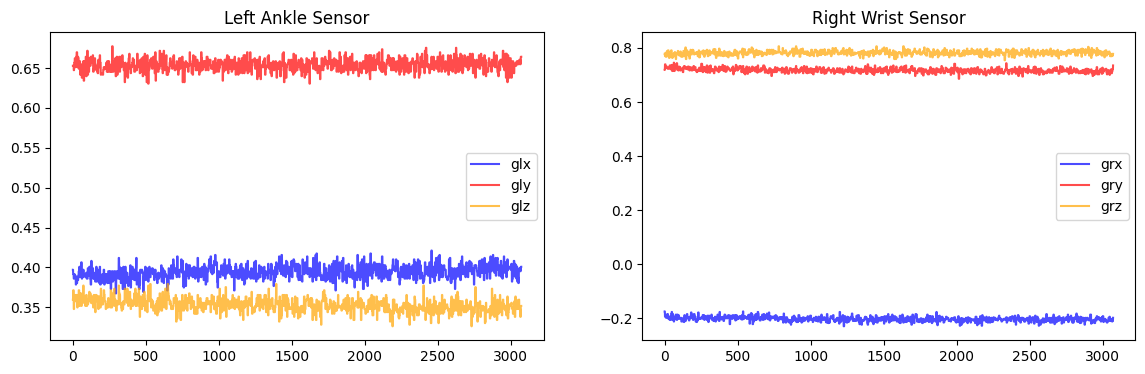

========Walking (1 min) - a========


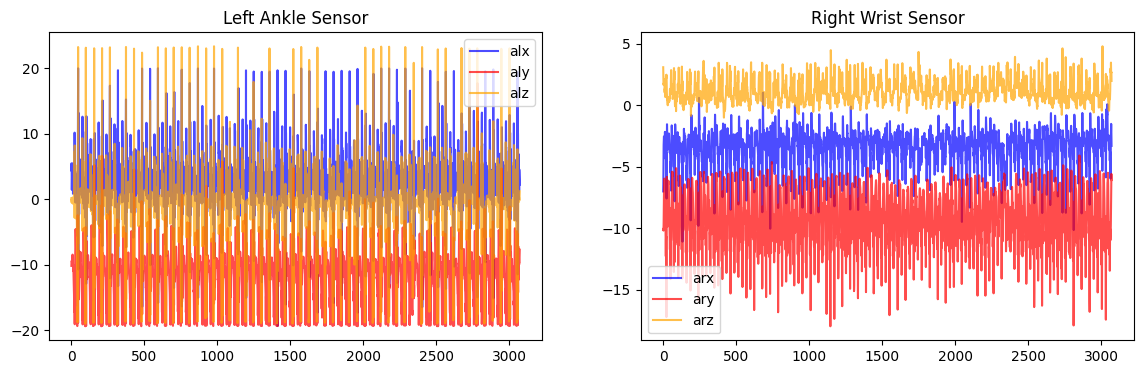

========Walking (1 min) - g========


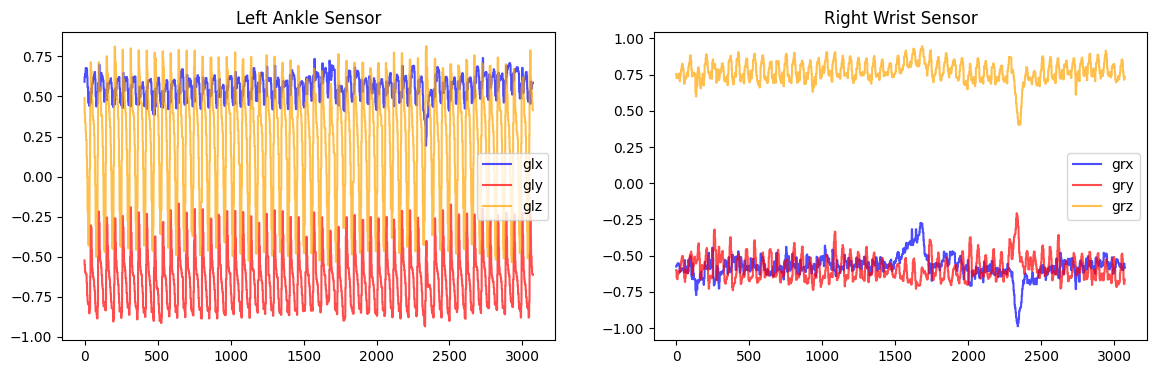

========Climbing stairs (1 min) - a========


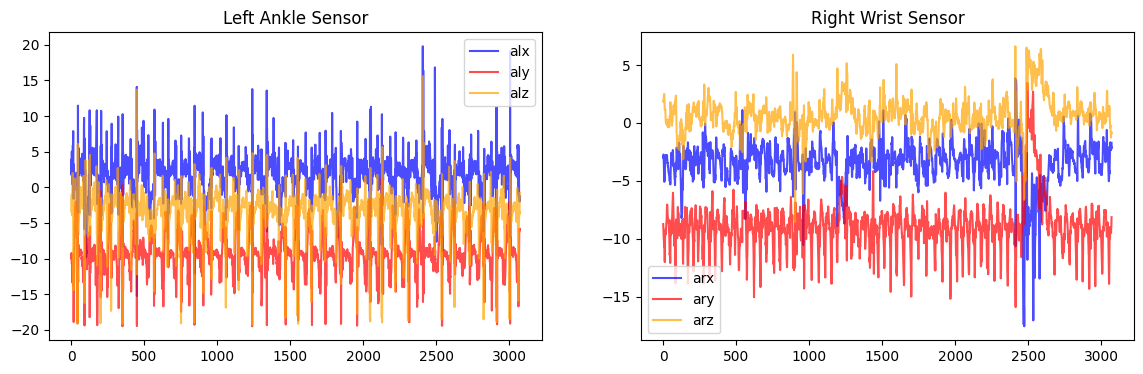

========Climbing stairs (1 min) - g========


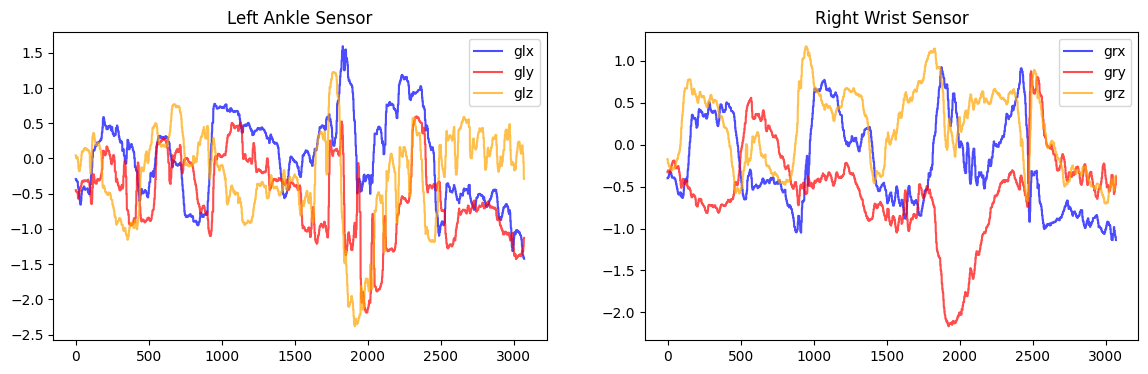

========Waist bends forward (20x) - a========


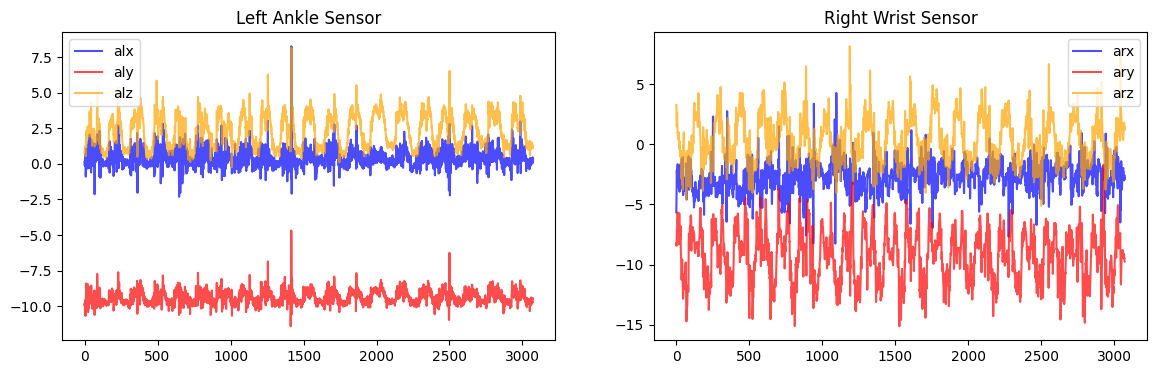

========Waist bends forward (20x) - g========


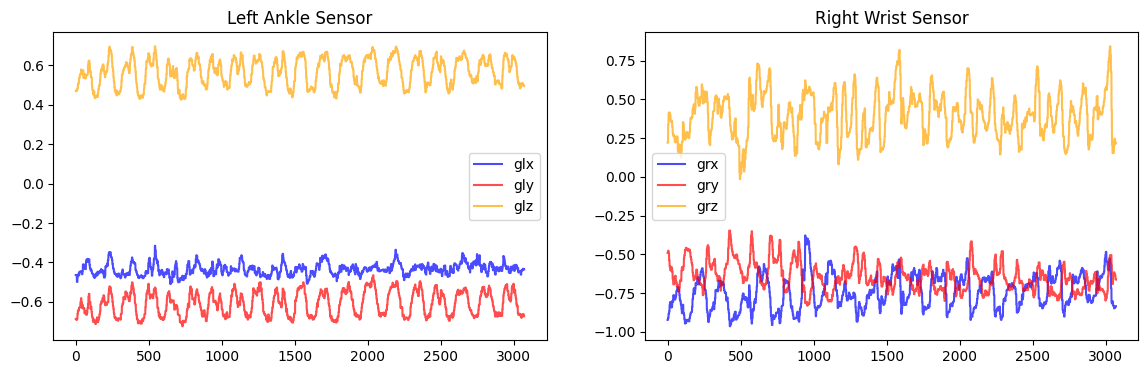

========Frontal elevation of arms (20x) - a========


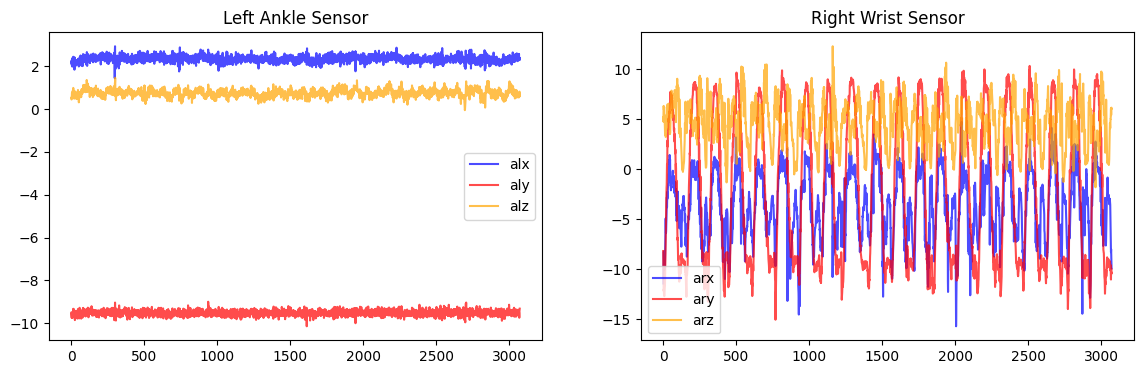

========Frontal elevation of arms (20x) - g========


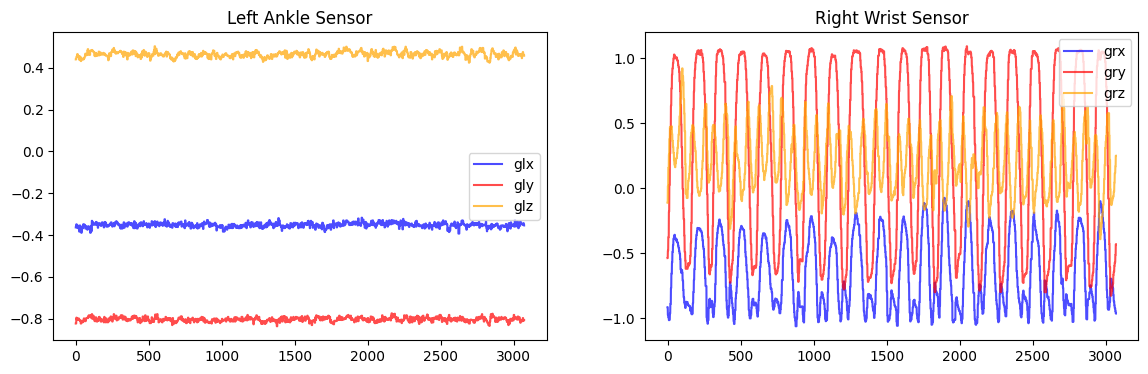

========Knees bending (crouching) (20x) - a========


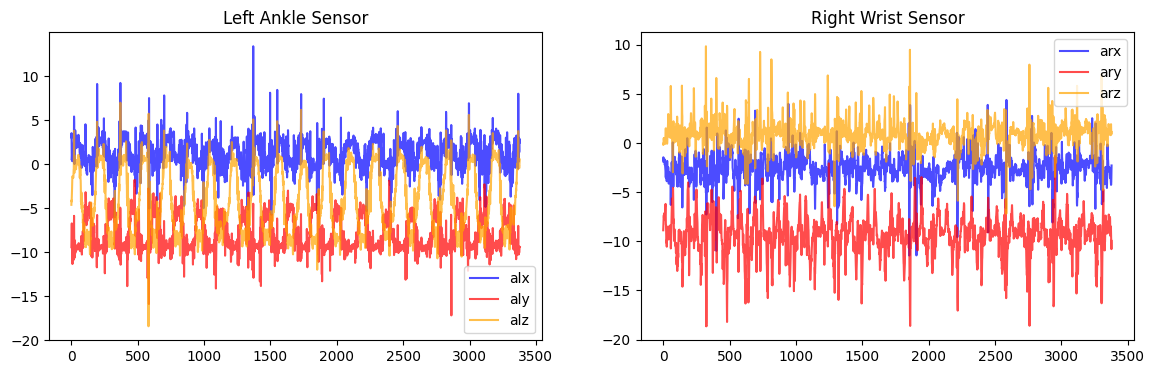

========Knees bending (crouching) (20x) - g========


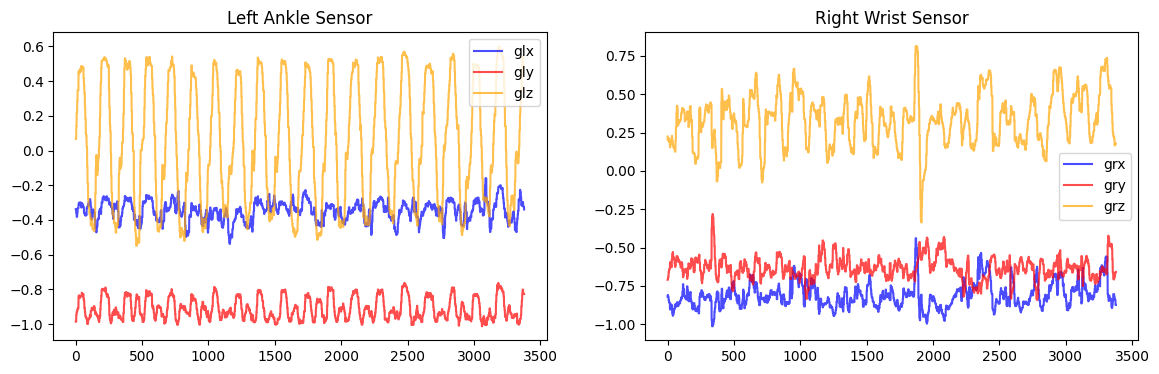

========Cycling (1 min) - a========


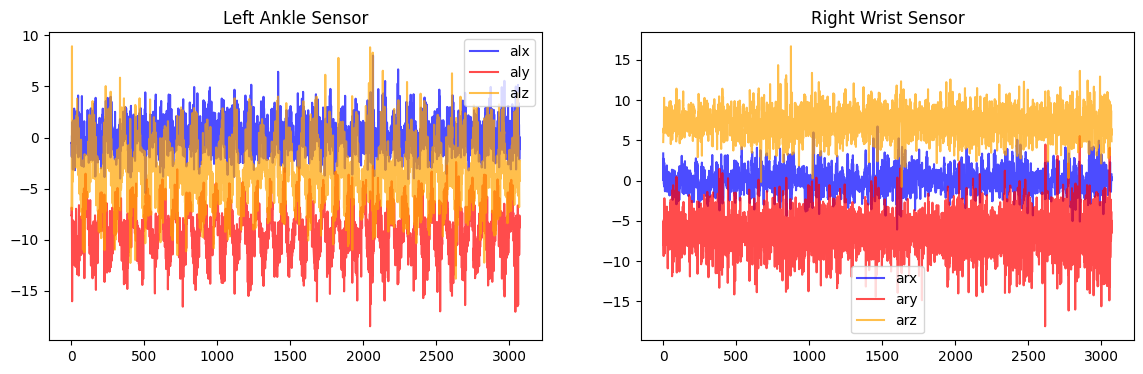

========Cycling (1 min) - g========


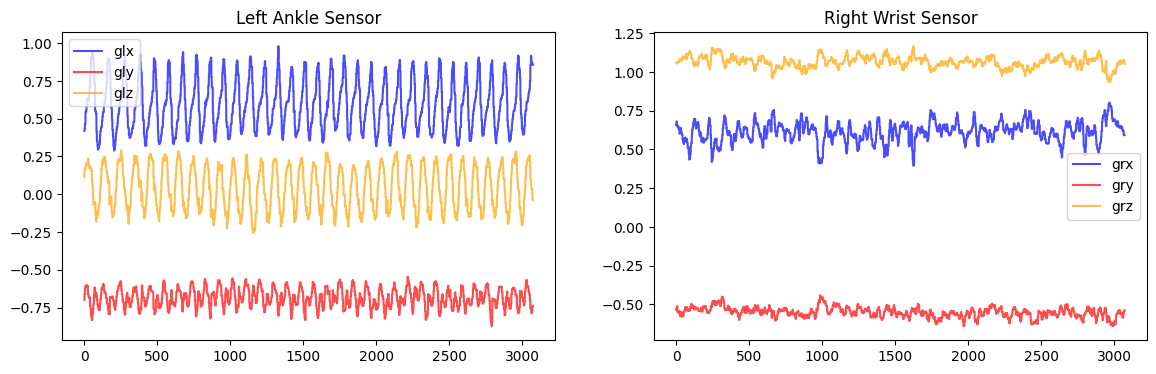

========Jogging (1 min) - a========


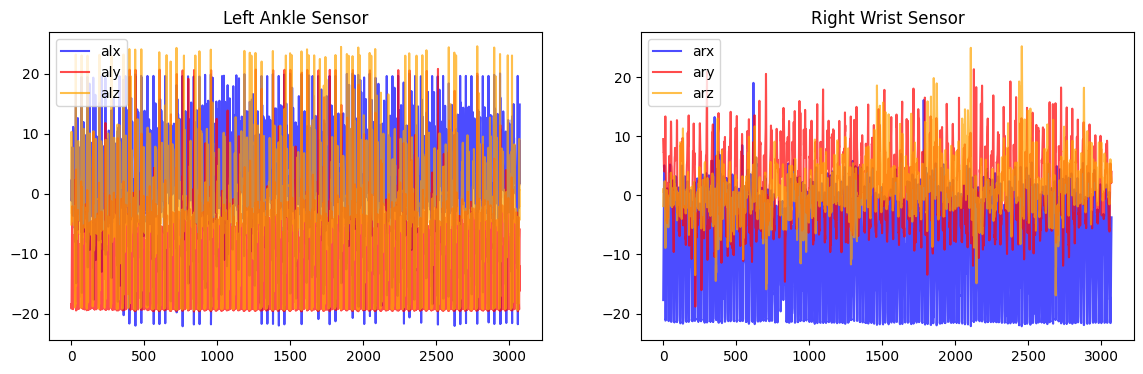

========Jogging (1 min) - g========


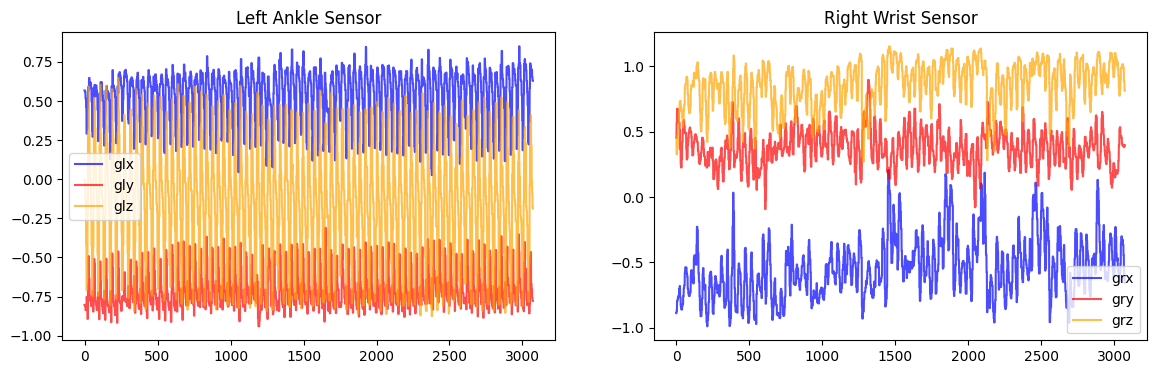

========Running (1 min) - a========


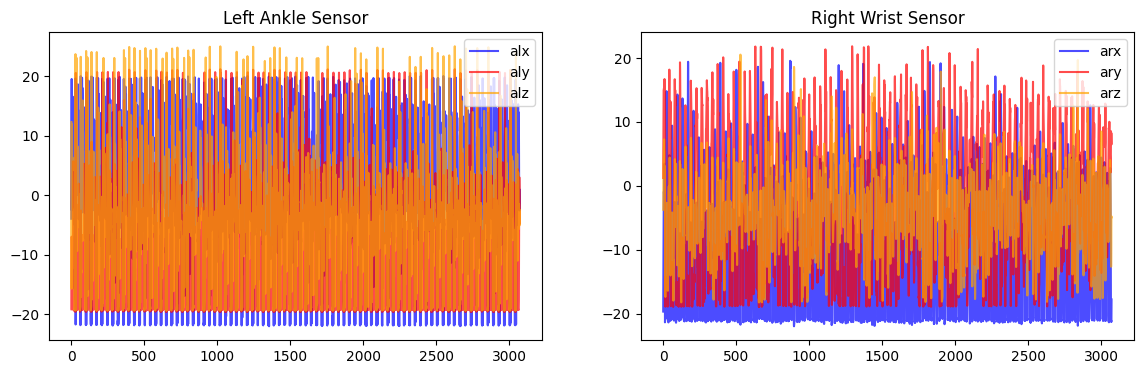

========Running (1 min) - g========


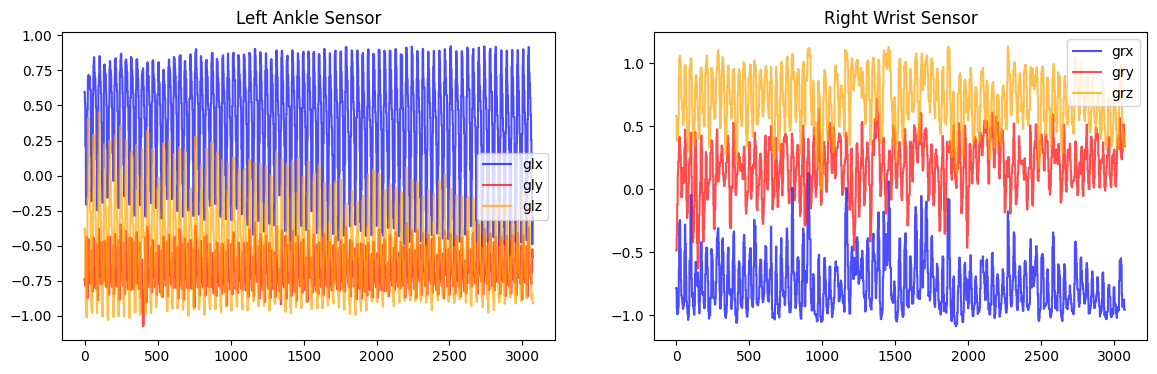

========Jump front & back (20x) - a========


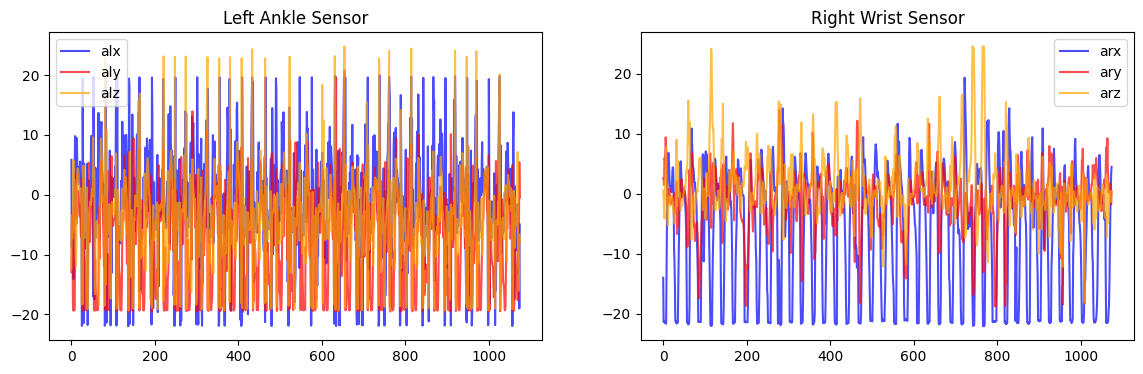

========Jump front & back (20x) - g========


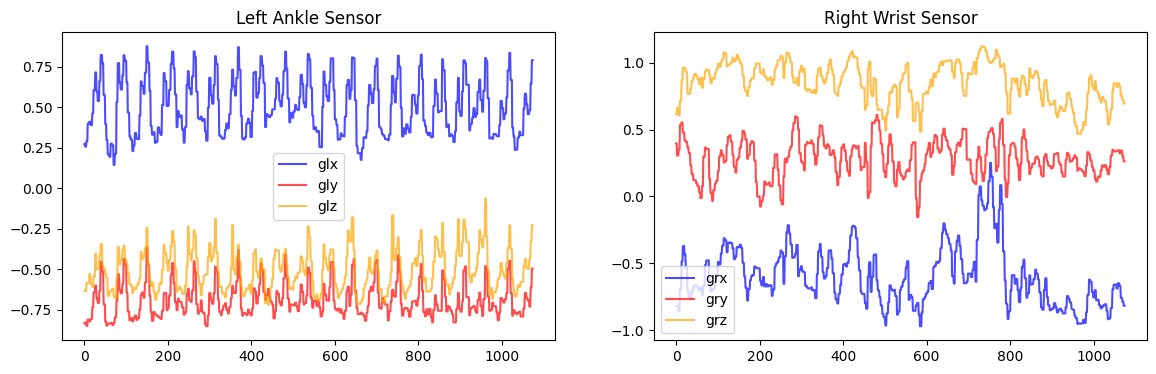

In [79]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a','g']

for i in range(1,13):
  for r in readings:
    print(f"========{activity_label[i]} - {r}========")
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)
    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "lx"], color = 'blue', alpha = 0.7, label = r + "lx")
    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "ly"], color = 'red', alpha = 0.7, label = r + "ly")
    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "lz"], color = 'orange', alpha = 0.7, label = r + "lz")
    plt.title("Left Ankle Sensor")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx")
    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "ry"], color = 'red', alpha = 0.7, label = r + "ry")
    plt.plot(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "rz"], color = 'orange', alpha = 0.7, label = r + "rz")
    plt.title("Right Wrist Sensor")
    plt.legend()

    plt.show()


========Standing still (1 min) - a========


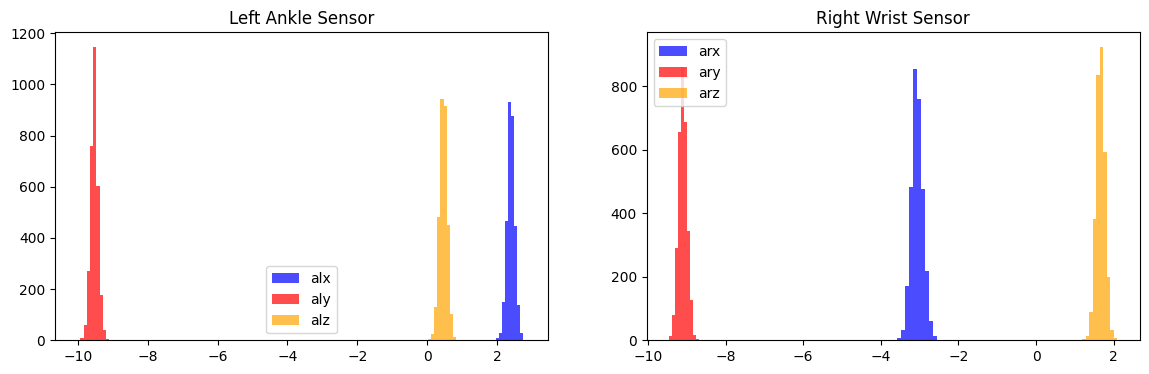

========Standing still (1 min) - g========


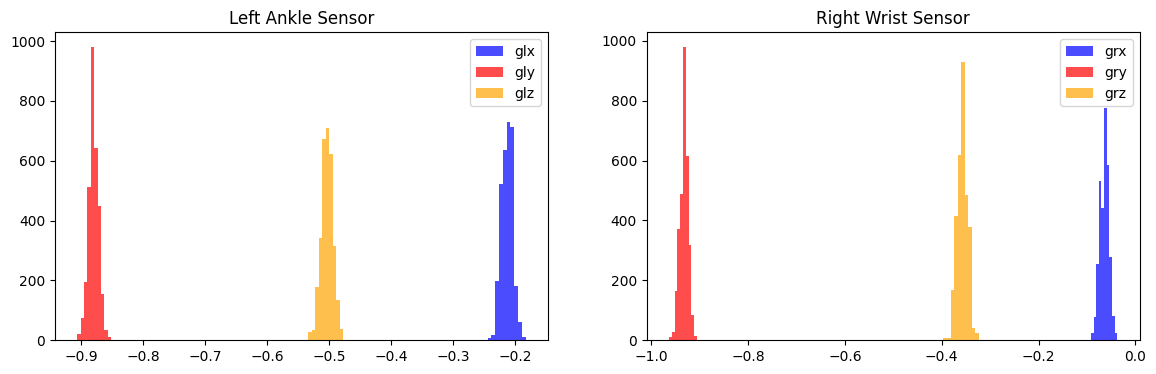

========Sitting and relaxing (1 min) - a========


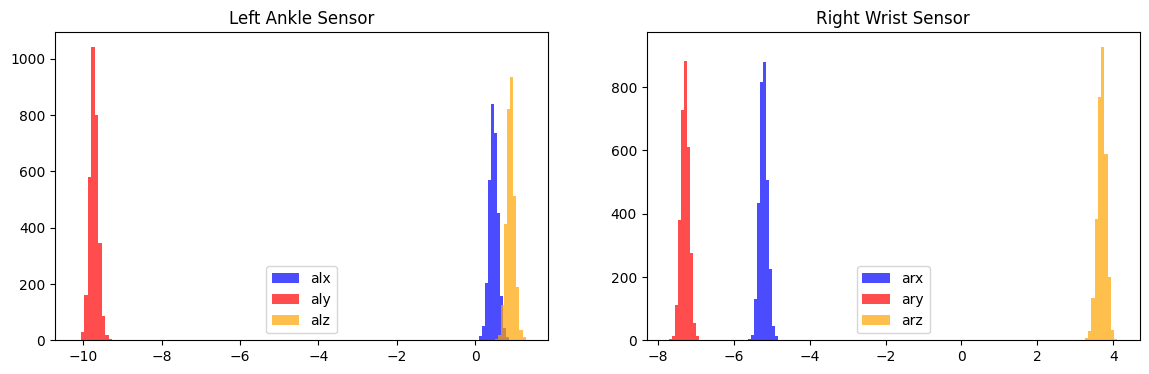

========Sitting and relaxing (1 min) - g========


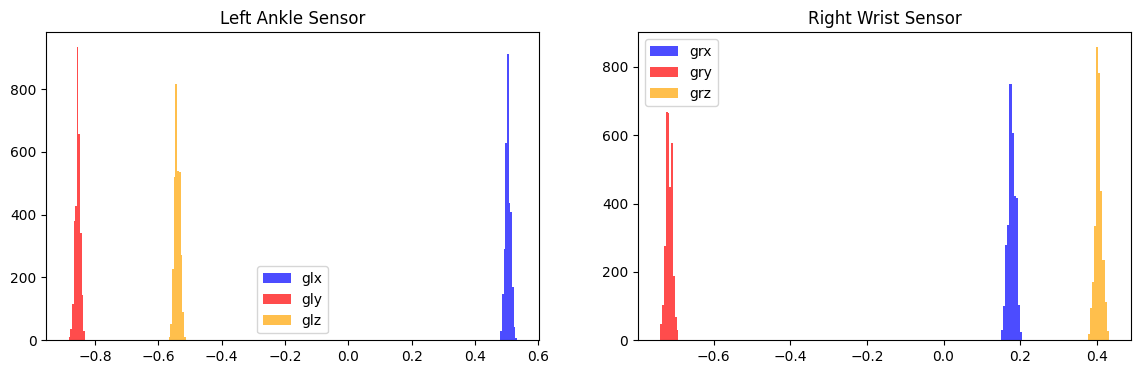

========Lying down (1 min) - a========


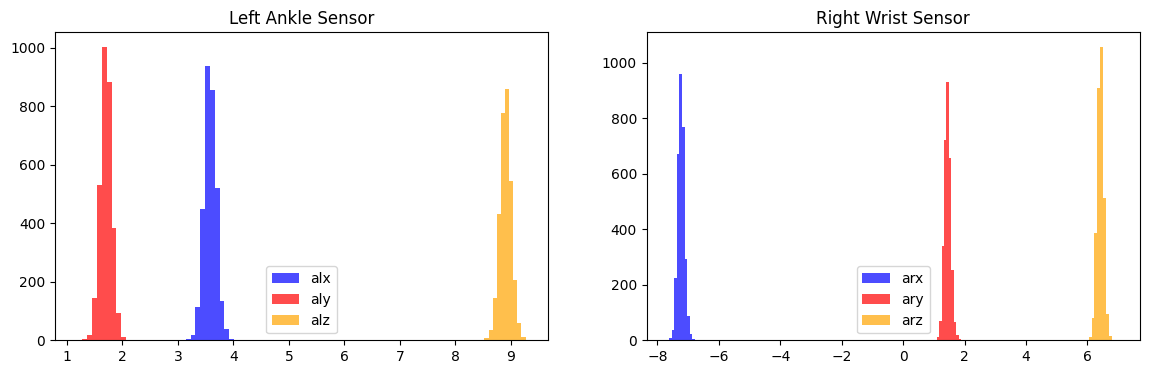

========Lying down (1 min) - g========


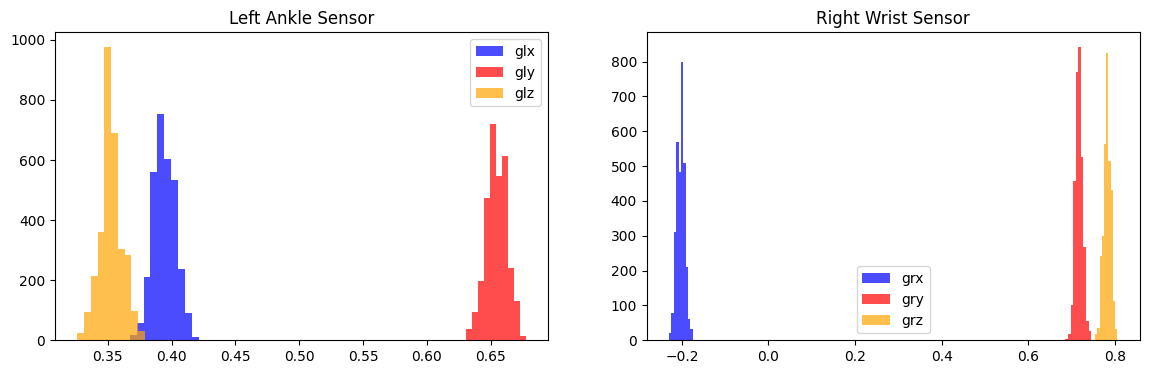

========Walking (1 min) - a========


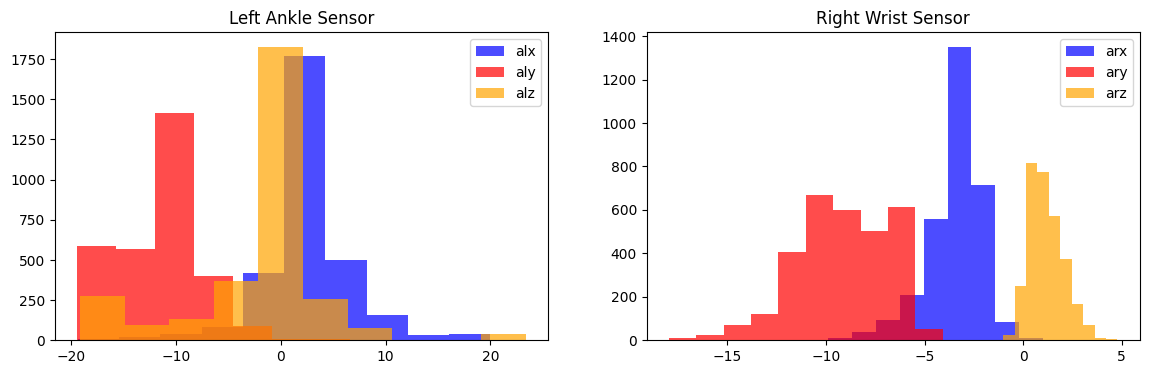

========Walking (1 min) - g========


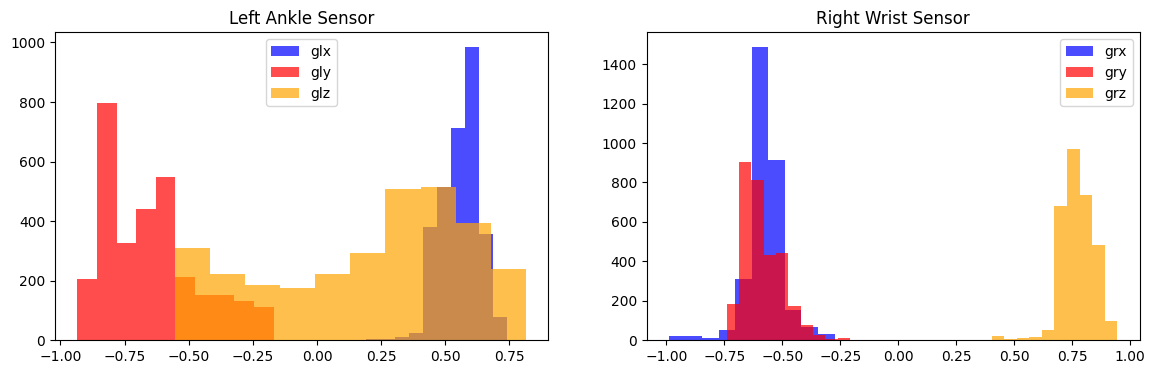

========Climbing stairs (1 min) - a========


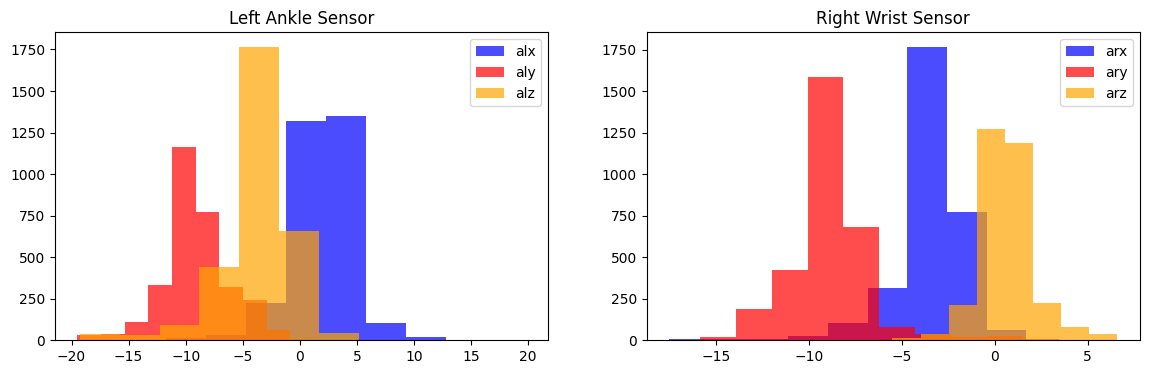

========Climbing stairs (1 min) - g========


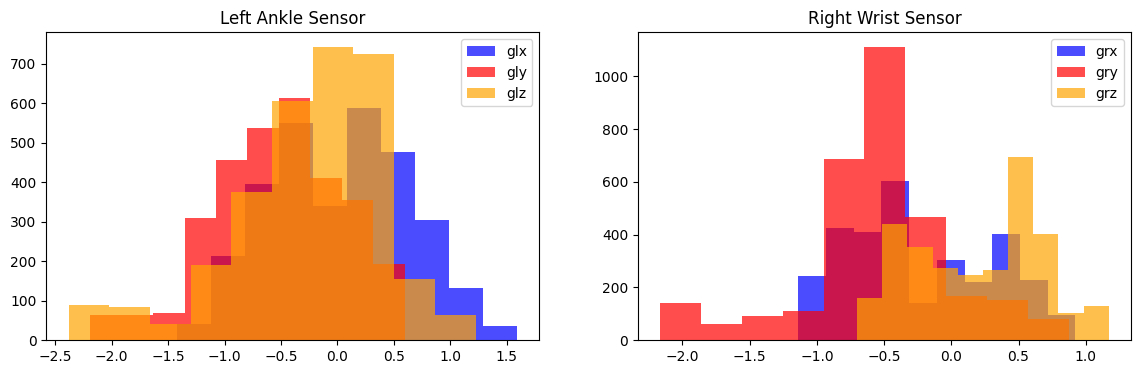

========Waist bends forward (20x) - a========


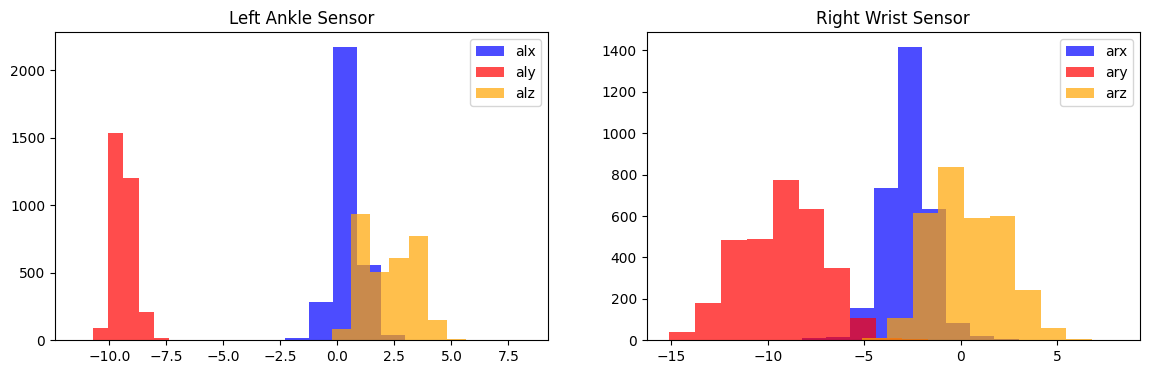

========Waist bends forward (20x) - g========


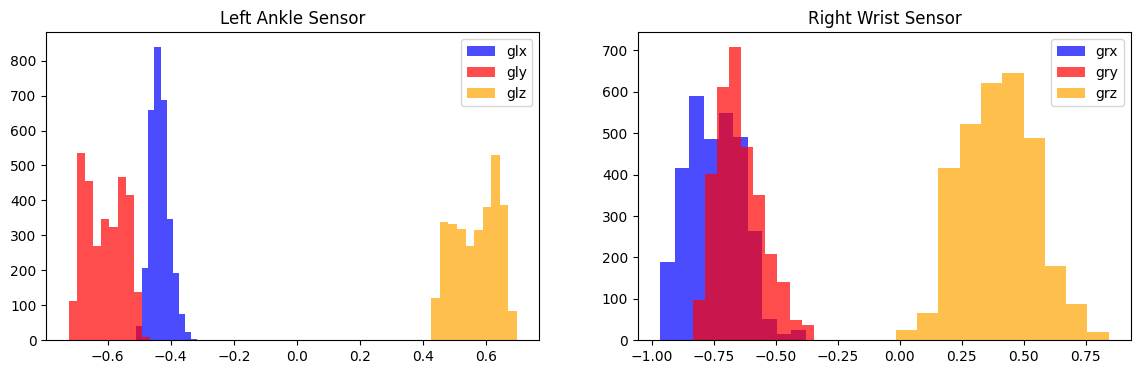

========Frontal elevation of arms (20x) - a========


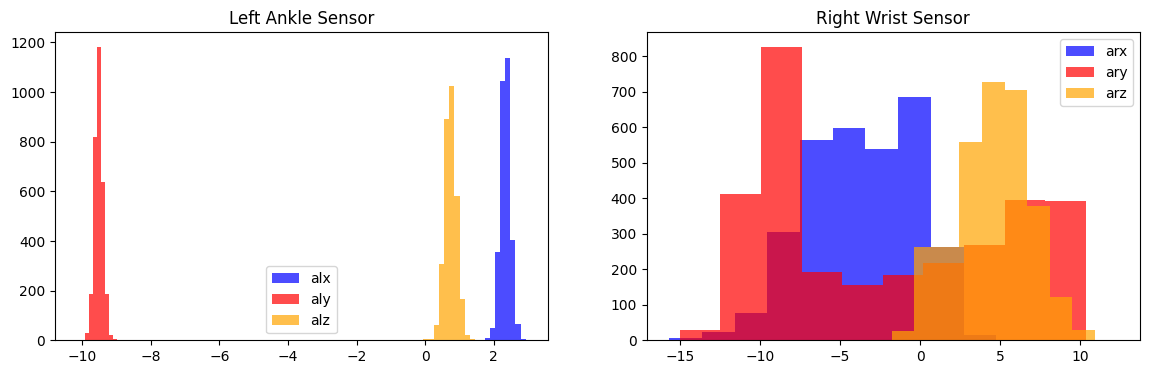

========Frontal elevation of arms (20x) - g========


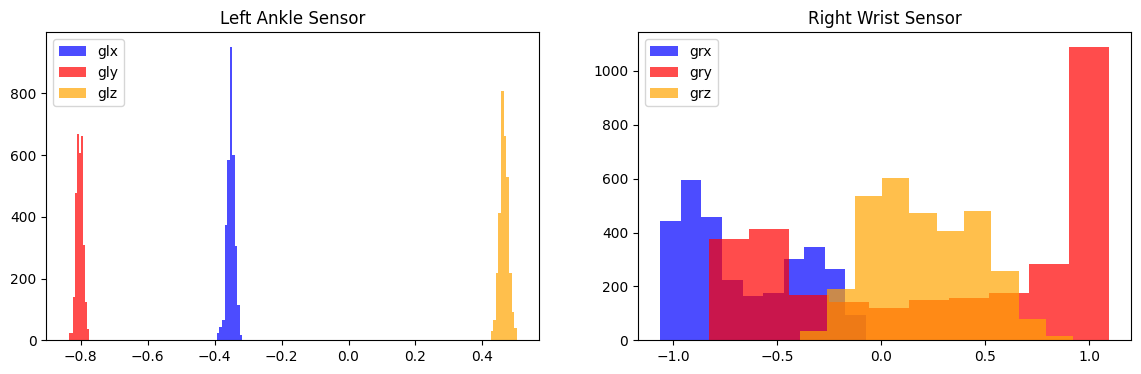

========Knees bending (crouching) (20x) - a========


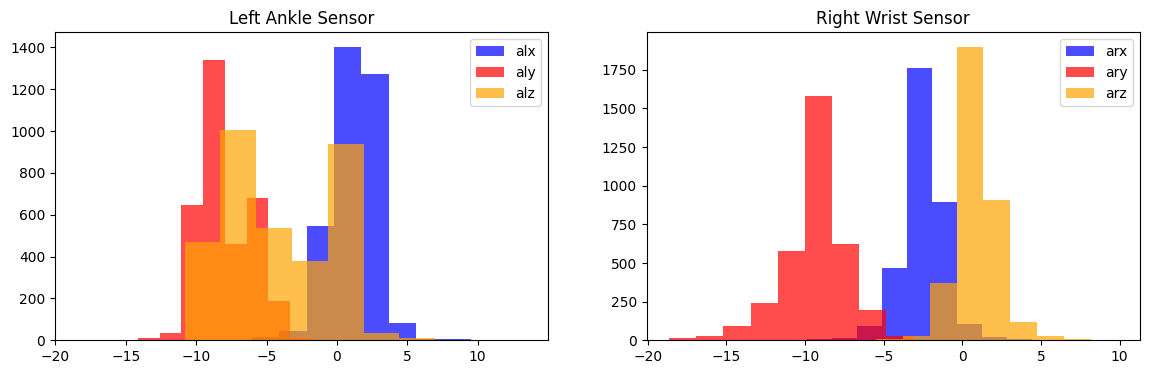

========Knees bending (crouching) (20x) - g========


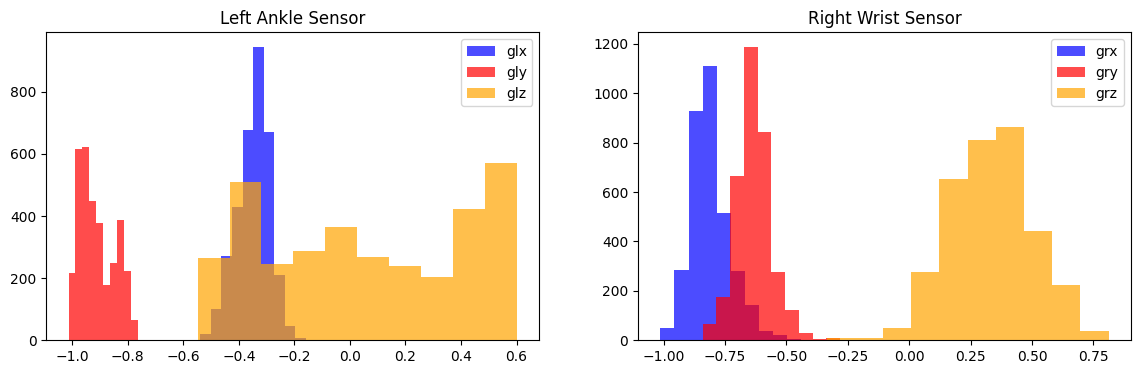

========Cycling (1 min) - a========


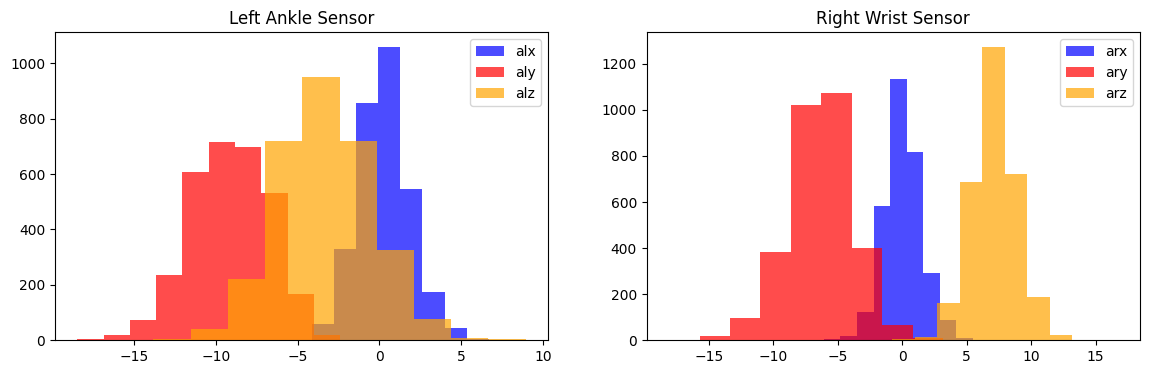

========Cycling (1 min) - g========


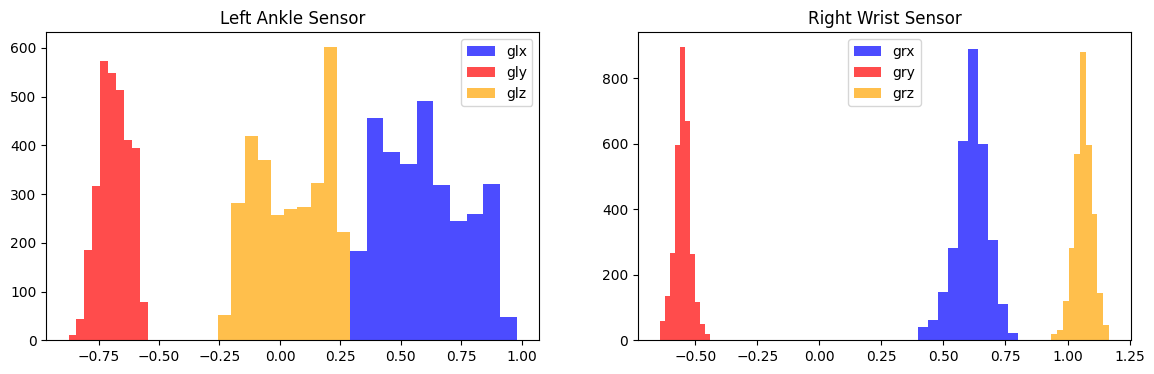

========Jogging (1 min) - a========


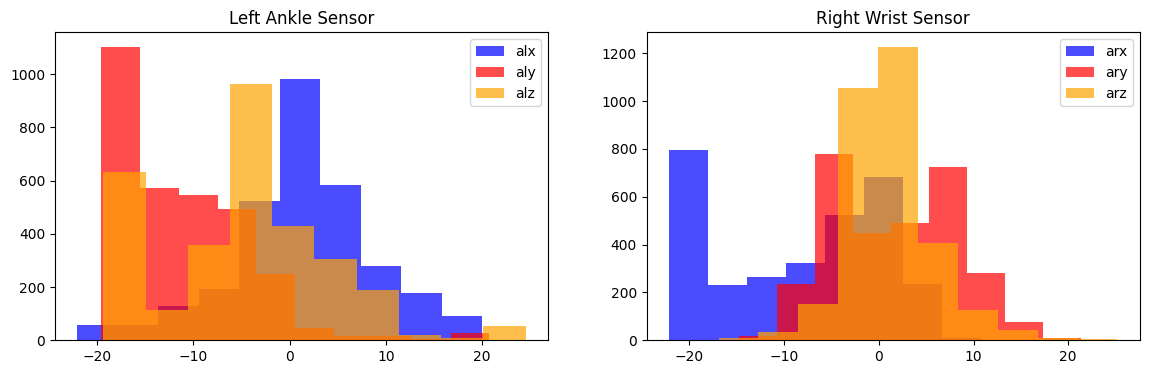

========Jogging (1 min) - g========


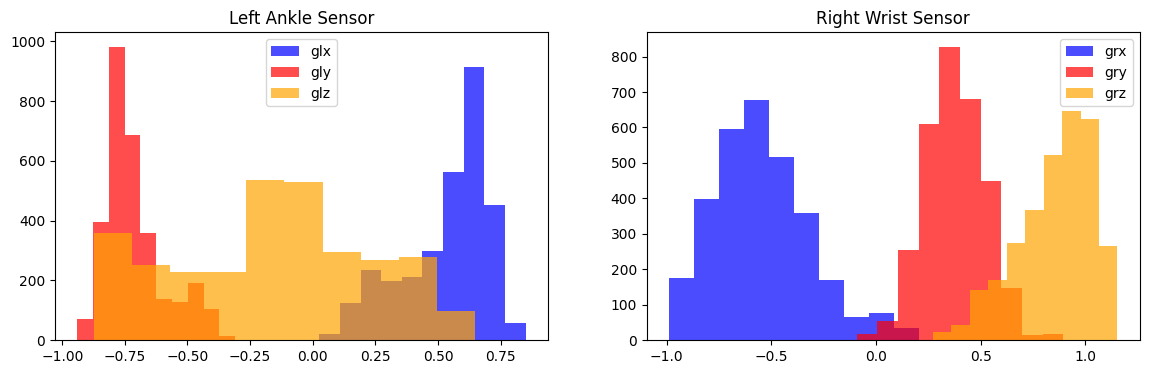

========Running (1 min) - a========


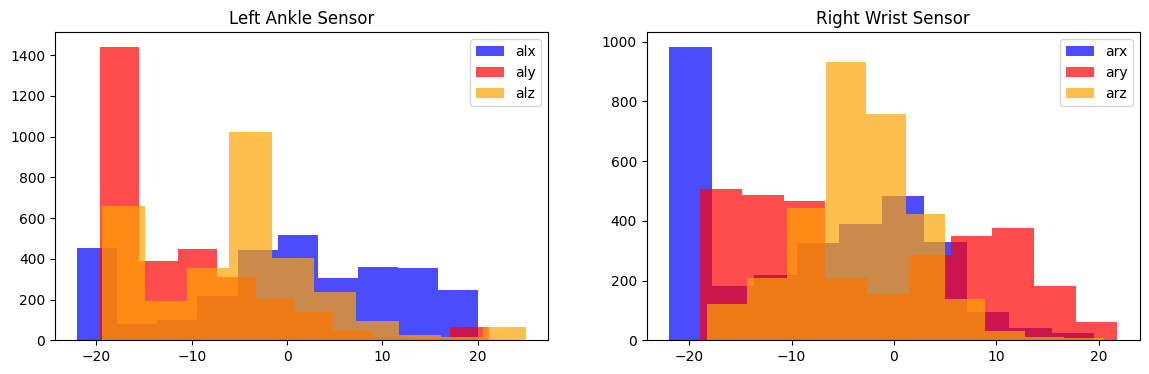

========Running (1 min) - g========


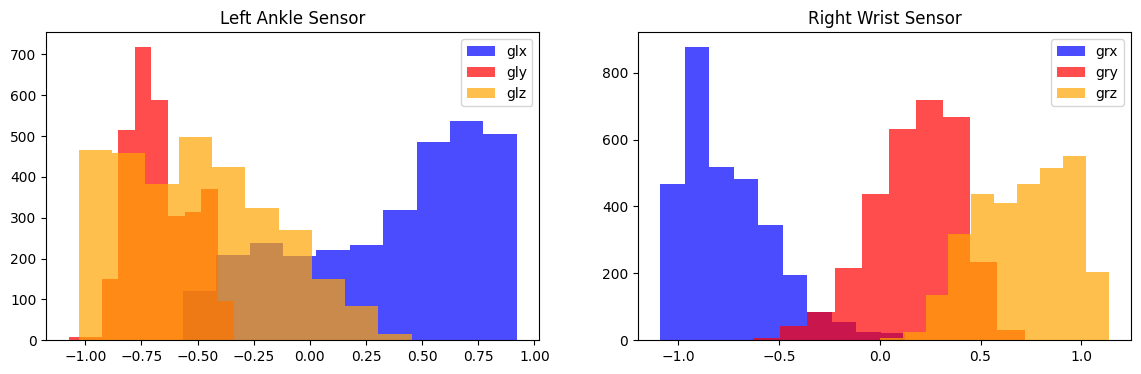

========Jump front & back (20x) - a========


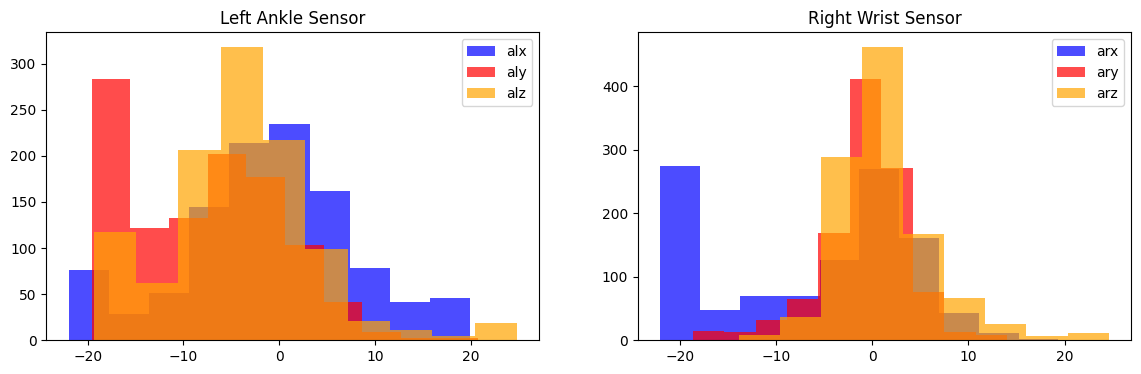

========Jump front & back (20x) - g========


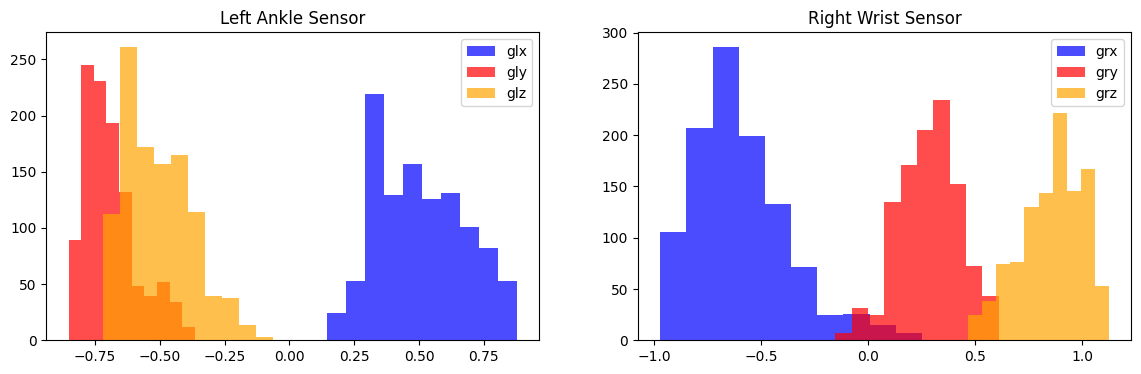

In [80]:
# Histogram plot
subject1 = df[df['subject'] == 'subject1']
readings = ['a','g']

for i in range(1,13):
  for r in readings:
    print(f"========{activity_label[i]} - {r}========")
    plt.figure(figsize=(14,4))

    plt.subplot(1,2,1)
    plt.hist(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "lx"], color = 'blue', alpha = 0.7, label = r + "lx")
    plt.hist(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "ly"], color = 'red', alpha = 0.7, label = r + "ly")
    plt.hist(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "lz"], color = 'orange', alpha = 0.7, label = r + "lz")
    plt.title("Left Ankle Sensor")
    plt.legend()

    plt.subplot(1,2,2)
    plt.hist(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "rx"], color = 'blue', alpha = 0.7, label = r + "rx")
    plt.hist(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "ry"], color = 'red', alpha = 0.7, label = r + "ry")
    plt.hist(subject1[subject1['Activity'] == i].reset_index(drop = True)[r + "rz"], color = 'orange', alpha = 0.7, label = r + "rz")
    plt.title("Right Wrist Sensor")
    plt.legend()

    plt.show()


In [81]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],["None",
                                                                        "Standing still (1 min)",
                                                                        "Sitting and relaxing (1 min)",
                                                                        "Lying down (1 min)",
                                                                        "Walking (1 min)",
                                                                        "Climbing stairs (1 min)",
                                                                        "Waist bends forward (20x)",
                                                                        "Frontal elevation of arms (20x)",
                                                                        "Knees bending (crouching) (20x)",
                                                                        "Cycling (1 min)",
                                                                        "Jogging (1 min)",
                                                                        "Running (1 min)",
                                                                        "Jump front & back (20x)"])

In [82]:
df['Activity']

990019                        None
953904                        None
610078                        None
838293                        None
352987                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [83]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Climbing stairs (1 min)            30720
Running (1 min)                    30720
Jogging (1 min)                    30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

<Axes: ylabel='count'>

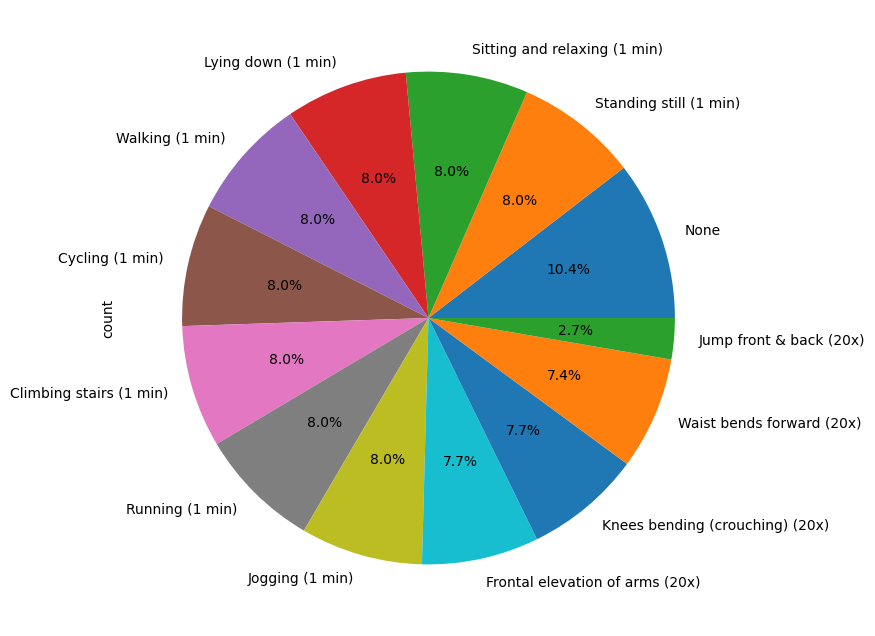

In [84]:
plt.figure(figsize=(12,8))
round(df['Activity'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = '%2.1f%%')

In [85]:
df1 = df.copy()

for feature in df1.columns[:-2]:
  lower_range = np.quantile(df1[feature], 0.01)
  upper_range = np.quantile(df1[feature], 0.99)
  print(feature, "range", lower_range, 'to', upper_range)

  df1 = df1.drop(df1[(df1[feature]> upper_range) | (df1[feature] < lower_range)].index, axis = 0)
  print("shape", df1.shape)

alx range -11.51306 to 19.223
shape (375547, 14)
aly range -19.363 to 1.8237699999999895
shape (368036, 14)
alz range -18.605 to 11.865300000000047
shape (360678, 14)
glx range -0.76067 to 0.80148
shape (353545, 14)
gly range -1.0394 to 0.96811
shape (346523, 14)
glz range -1.0963 to 0.82711
shape (339698, 14)
arx range -21.462 to 6.8235
shape (332906, 14)
ary range -18.682 to 10.838950000000011
shape (326263, 14)
arz range -6.38154 to 10.296
shape (319741, 14)
grx range -1.0059 to 0.89412
shape (313607, 14)
gry range -1.1253 to 0.92402
shape (307472, 14)
grz range -0.66164 to 1.1164
shape (301469, 14)


In [86]:
df

alx      aly      alz      glx      gly       glz       arx  \
990019    0.73980  -9.8128  0.90218  0.43970 -0.71482  0.451870  -2.89770   
953904    4.72390 -19.1950  5.23330 -0.19852 -1.03380 -0.003929 -11.64300   
610078    1.42560 -13.8700  0.12284  0.34694 -0.85553  0.253440  -9.63010   
838293    1.14550  -9.7249  1.76480  0.25788 -0.62289  0.634580  -1.80410   
352987   -0.19016 -10.1040 -0.54879 -0.68089 -0.74672 -0.351670  -0.35678   
...           ...      ...      ...      ...      ...       ...       ...   
1213641  -2.48730 -19.2330  3.46140  0.61967 -0.33771 -0.827110  -8.23480   
1213642 -21.59100 -19.4370 -6.04190  0.61967 -0.33771 -0.827110 -21.31800   
1213643   7.54330 -19.2450 -2.66800  0.61967 -0.33771 -0.827110 -21.29700   
1213644   3.01420 -19.3340 -7.70740  0.71058 -0.27017 -0.754420 -21.13800   
1213645  -2.36980 -19.3000 -4.23870  0.71058 -0.27017 -0.754420 -21.17300   

             ary      arz      grx       gry       grz  \
990019   -8.9244  2.56420 -0.21961 -0.601640  0.965520   
953904    3.8516 -2.83870 -0.53137  0.979470 -0.036638   
610078   -0.2890  2.10010 -0.94902  0.041068  0.625000   
838293   -8.7461  2.38560  0.00000 -0.652980  0.939660   
352987  -10.1440  3.60740 -0.18431 -0.993840 -0.437500   
...          ...      ...      ...       ...       ...   
1213641  -4.9652  2.48090 -0.43725 -1.018500  0.079741   
1213642 -10.2130  3.65600 -0.43725 -1.018500  0.079741   
1213643 -18.7050  4.46060 -0.43725 -1.018500  0.079741   
1213644 -18.6980  1.15880 -0.42549 -1.037000  0.084052   
1213645 -14.2910 -0.13123 -0.42549 -1.037000  0.084052   

                        Activity    subject  
990019                      None   subject9  
953904                      None   subject8  
610078                      None   subject5  
838293                      None   subject7  
352987                      None   subject3  
...                          ...        ...  
1213641  Jump front & back (20x)  subject10  
1213642  Jump front & back (20x)  subject10  
1213643  Jump front & back (20x)  subject10  
1213644  Jump front & back (20x)  subject10  
1213645  Jump front & back (20x)  subject10  

[383195 rows x 14 columns]

# **DATA PREPROCESSING**

In [87]:
le = LabelEncoder()
df['subject'] = le.fit_transform(df['subject'])

In [88]:
df['Activity'] = le.fit_transform(df['Activity'])

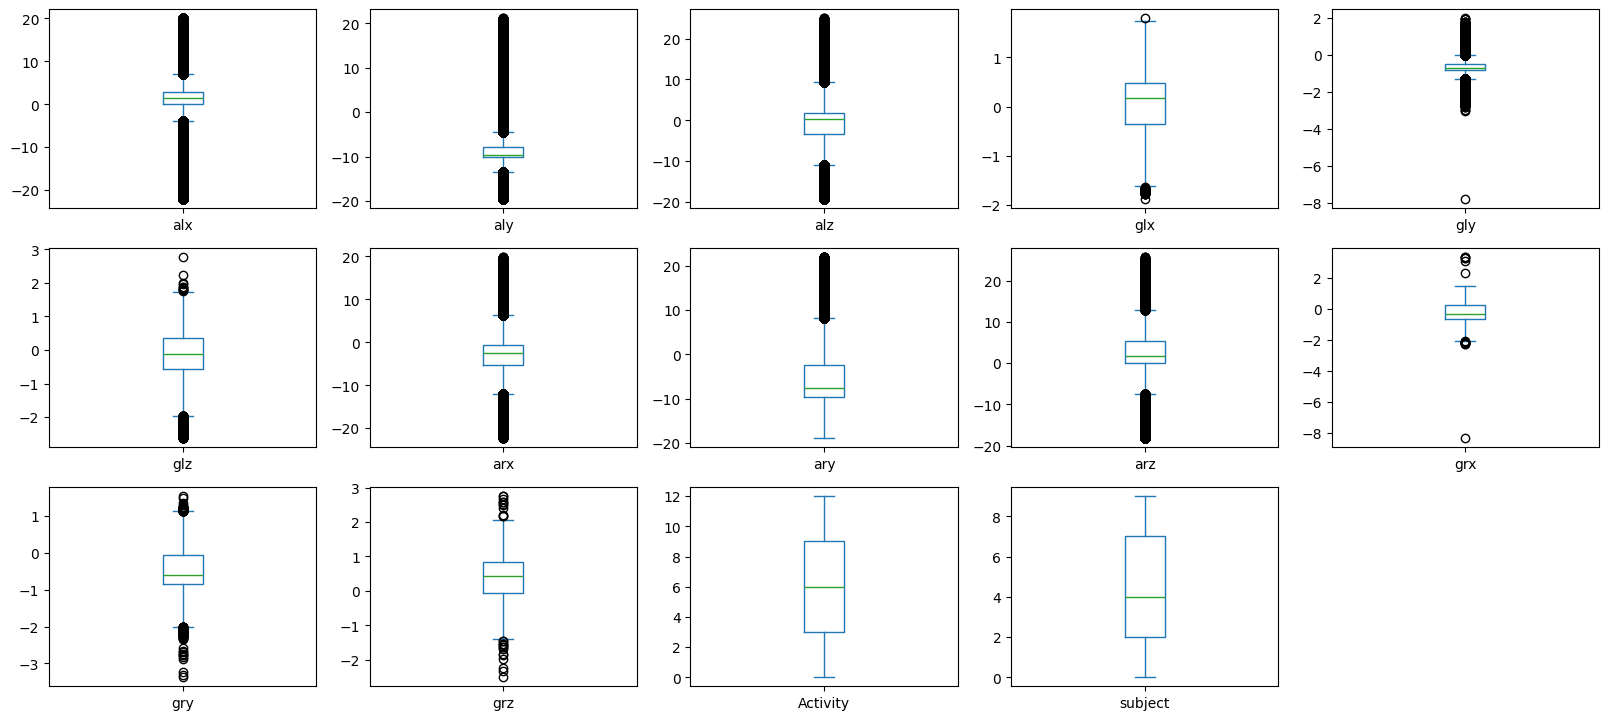

In [89]:
df.plot(kind = 'box', subplots = True, layout = (5,5), figsize = (20,15) )
plt.show()

In [90]:
X = df.drop(['Activity', 'subject'], axis = 1).values
y = df['Activity'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [92]:
ro_scalar = RobustScaler().fit(X_train)
X_train_scaled = ro_scalar.transform(X_train)
X_test_scaled = ro_scalar.transform(X_test)

# **MODEL BUILDING**

In [115]:
def resultsSummarizer(y_true, y_pred, cm_en = True):
  cm = confusion_matrix(y_true, y_pred)
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  rec = sensitivity = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  plt.figure(figsize=(15,15))
  if cm_en:
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=activity_label.values(), yticklabels=activity_label.values())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
  print(f'Accuracy: ' + '{:.4%}'.format(acc))
  print(f'Precision: ' + '{:.4%}'.format(prec))
  print(f'Recall_Score: ' + '{:.4%}'.format(rec))
  print(f'F1_score: ' + '{:.4%}'.format(f1))


In [94]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
lr.score(X_train, y_train)

0.5421404612451113

In [96]:
lr.score(X_test, y_test)

0.5444106932222674

In [97]:
lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
lr2.score(X_train_scaled, y_train)

0.5534488997759189

In [99]:
lr2.score(X_test_scaled, y_test)

0.5548596540673703

In [100]:
y_pred_lr = lr2.predict(X_test_scaled)

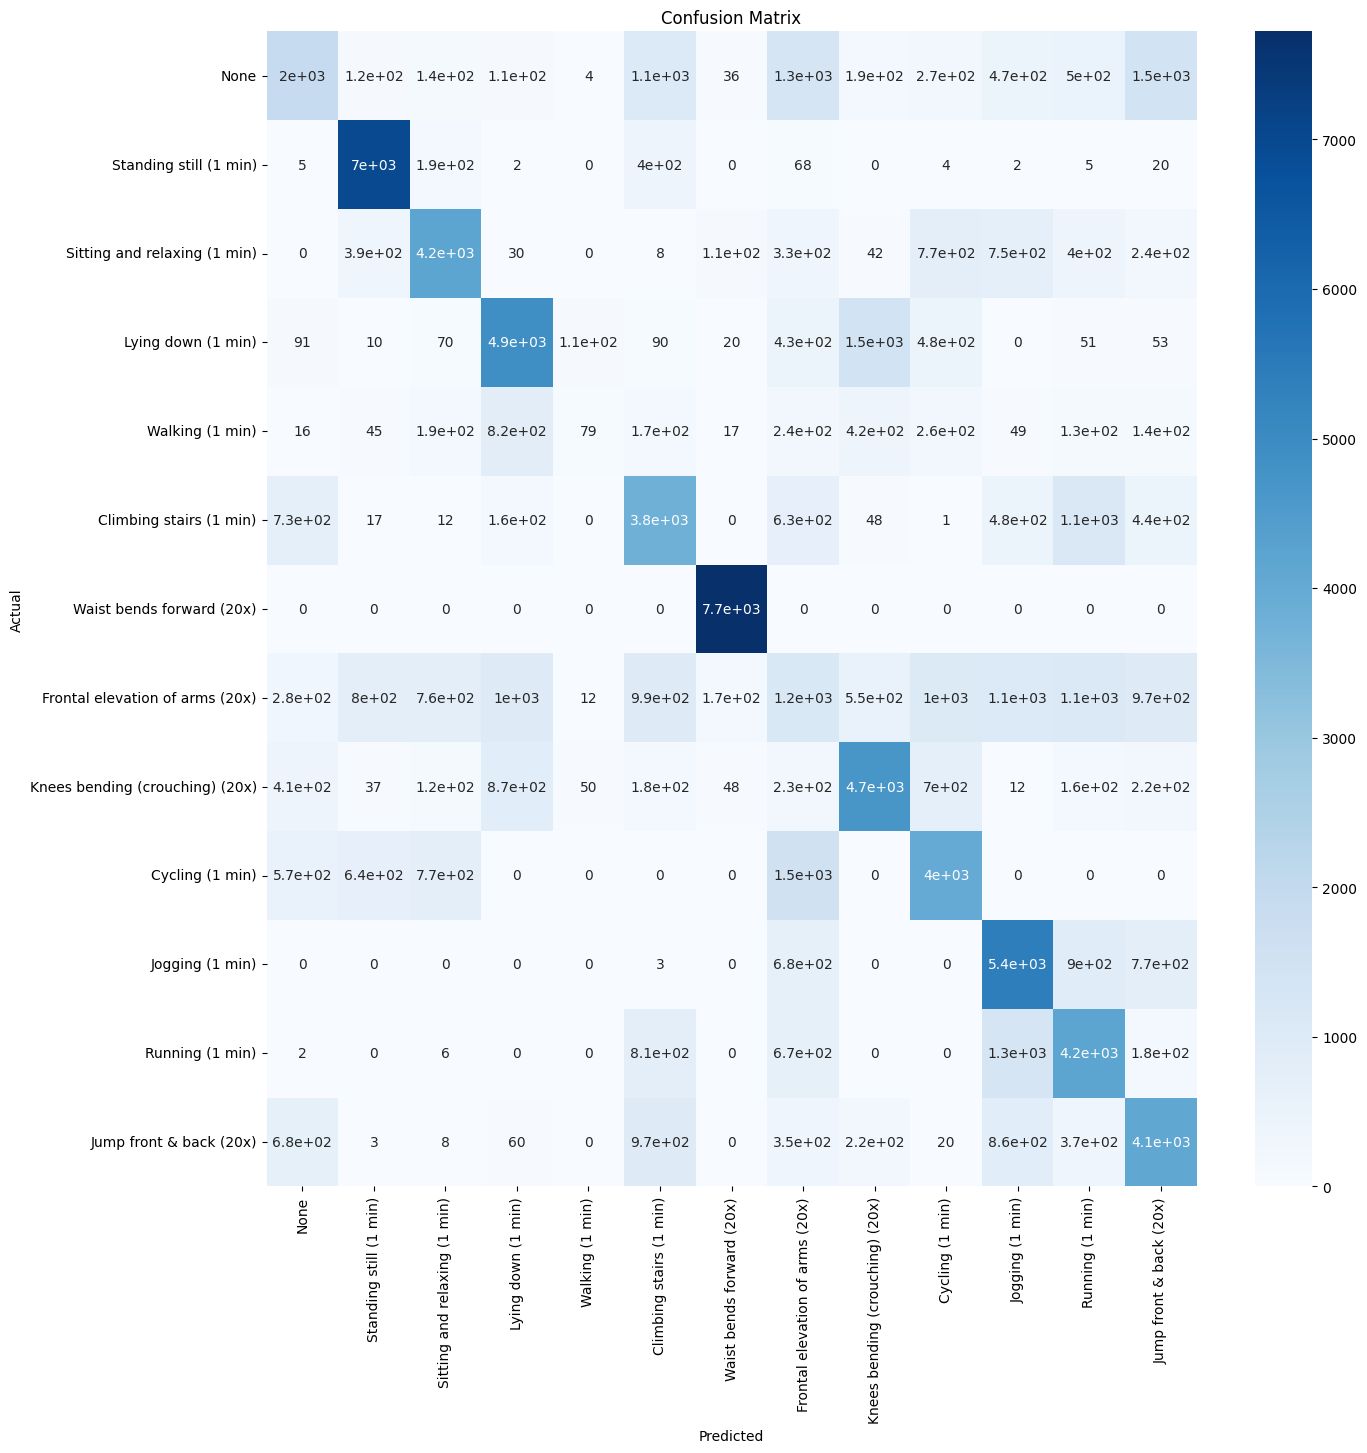

Accuracy: 55.4860%
Precision: 53.2040%
Recall_Score: 53.7382%
F1_score: 52.1969%


In [106]:
resultsSummarizer(y_test, y_pred_lr)

**2.  KNN**

In [108]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
y_pred_knn = knn1.predict(X_test)

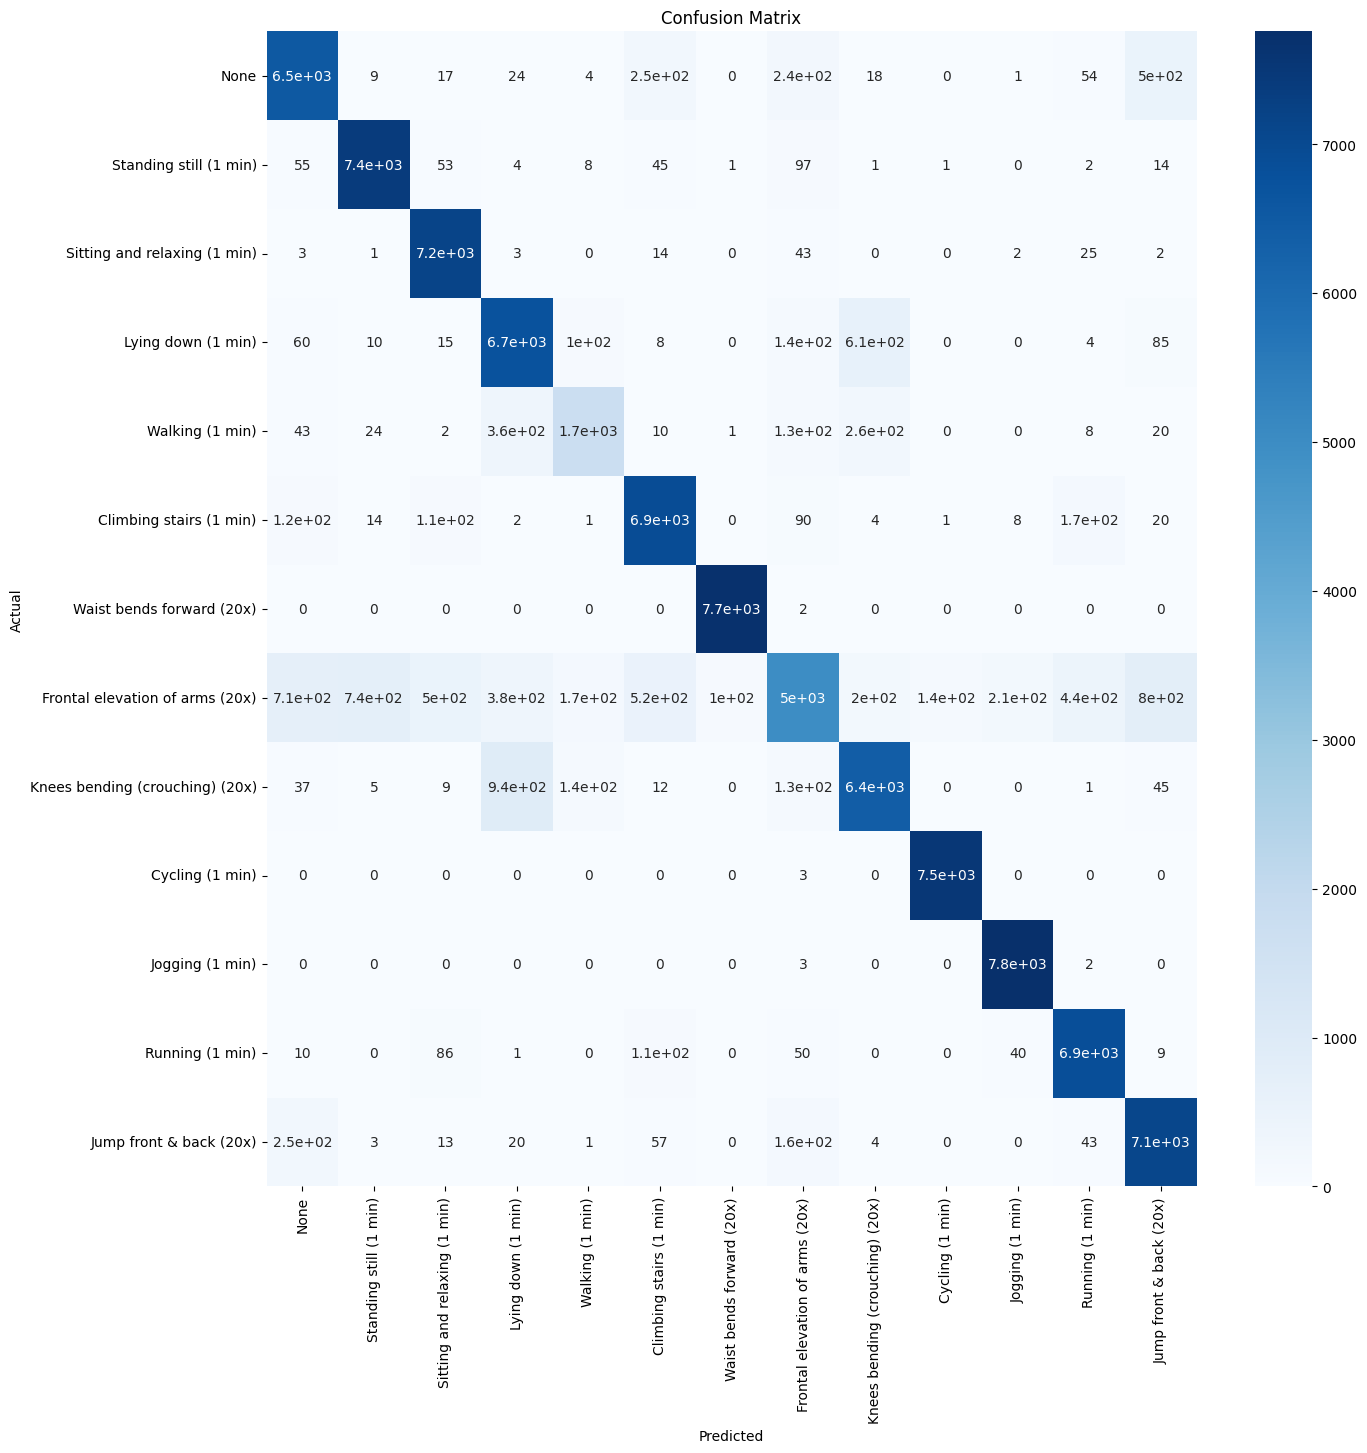

Accuracy: 88.5416%
Precision: 88.0657%
Recall_Score: 88.3932%
F1_score: 87.8111%


In [110]:
resultsSummarizer(y_test,y_pred_knn)

In [117]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled, y_train)
y_pred_knn2 = knn2.predict(X_test_scaled)

In [118]:
resultsSummarizer(y_test,y_pred_knn2,cm_en = False)

Accuracy: 93.7880%
Precision: 93.6640%
Recall_Score: 93.5167%
F1_score: 93.2374%


<Figure size 1500x1500 with 0 Axes>

In [119]:
for n in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  print("\n=================No. of Neighbours: {n}============================\n")
  resultsSummarizer(y_test, y_pred, cm_en=False)


=================No. of Neighbours: {n}============================

Accuracy: 93.7839%
Precision: 93.4896%
Recall_Score: 93.4955%
F1_score: 93.3912%

=================No. of Neighbours: {n}============================

Accuracy: 93.1826%
Precision: 92.8640%
Recall_Score: 93.0252%
F1_score: 92.7503%

=================No. of Neighbours: {n}============================

Accuracy: 94.0333%
Precision: 93.8680%
Recall_Score: 93.7920%
F1_score: 93.5290%

=================No. of Neighbours: {n}============================

Accuracy: 93.8110%
Precision: 93.6830%
Recall_Score: 93.5524%
F1_score: 93.2829%

=================No. of Neighbours: {n}============================

Accuracy: 93.7880%
Precision: 93.6640%
Recall_Score: 93.5167%
F1_score: 93.2374%

=================No. of Neighbours: {n}============================

Accuracy: 93.5761%
Precision: 93.5024%
Recall_Score: 93.3083%
F1_score: 93.0060%

=================No. of Neighbours: {n}============================

Accuracy: 93.4958%
Preci

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>